# Data Preprocessing

The images present in the dataset folder needs to be converted into tensors to feed them to a Convolutional Neural Network. this code creates and stores the data and their labels in data.npy and labels.npy .

I have created a custom dataset for my model. The poular dataset can be found online.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import keras

Using TensorFlow backend.


In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
with_mask = os.listdir("/content/drive/My Drive/Colab Notebooks/dataset/with_mask")
without_mask = os.listdir("/content/drive/My Drive/Colab Notebooks/dataset/without_mask") 

# Dataset of With Mask Images

In [6]:
with_mask_imgs = []
img_size = (150,150)

for i in with_mask:
    img_path = os.path.join("/content/drive/My Drive/Colab Notebooks/dataset/with_mask", i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(img, img_size)
    with_mask_imgs.append(resized_img)
len(with_mask_imgs[0].shape)

2

# Dataset of Without Mask Images


In [7]:
without_mask_imgs = []
img_size = (150,150)

for i in without_mask:
    img_path = os.path.join("/content/drive/My Drive/Colab Notebooks/dataset/without_mask", i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(img, img_size)
    without_mask_imgs.append(resized_img)
len(without_mask_imgs)

1930

# Classification of with and without mask images

***With Mask Images --> 1***







***Without Mask Images --> 0***

In [8]:
with_mask_labels = [1 for i in range(len(with_mask_imgs))]
len(with_mask_labels)

690

In [9]:
without_mask_labels = [0 for i in range(len(without_mask_imgs))]
len(without_mask_labels)

1930

In [10]:
data = np.asarray(with_mask_imgs+without_mask_imgs)
print(data.shape)

(2620, 150, 150)


In [11]:
labels = np.asarray(with_mask_labels + without_mask_labels)
labels.shape

(2620,)

In [12]:
data = np.reshape(data, (data.shape[0],data.shape[1],data.shape[2],1))
data.shape

(2620, 150, 150, 1)

## Using sklearn library of python we shuffle the with and without mask images .

In [13]:
from sklearn.utils import shuffle
data, labels = shuffle(data, labels)

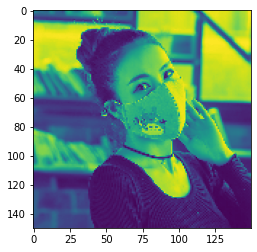

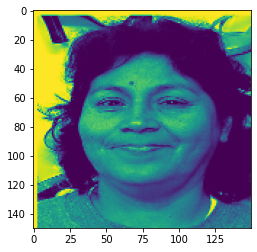

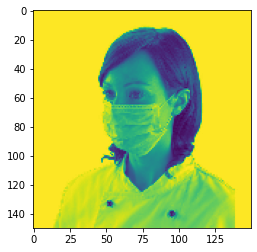

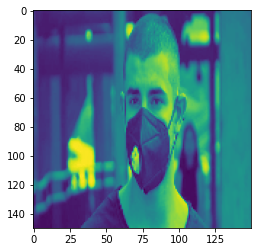

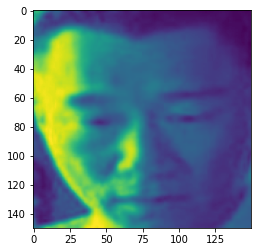

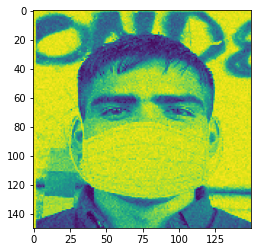

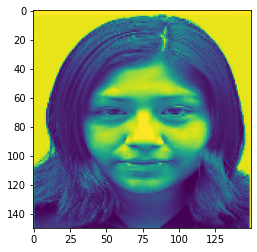

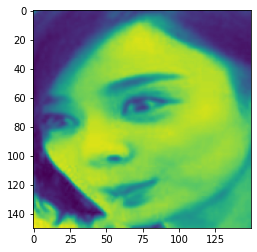

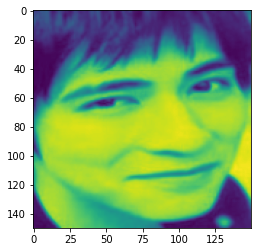

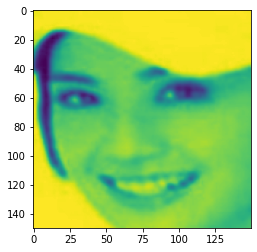

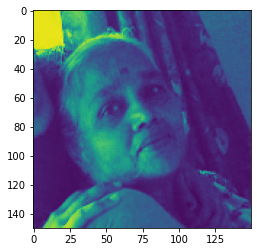

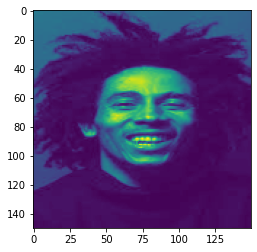

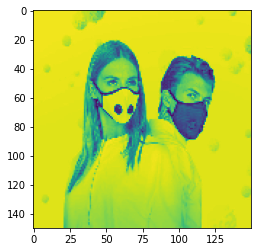

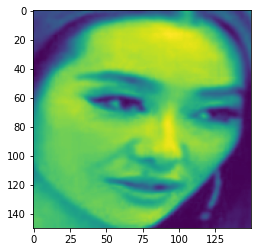

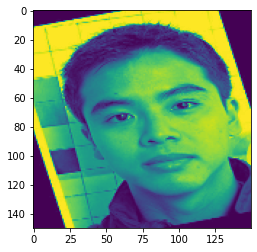

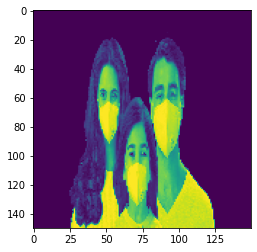

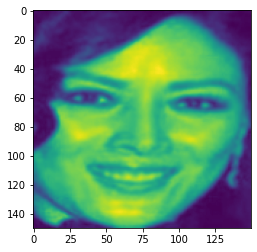

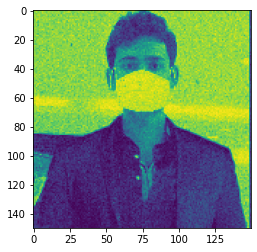

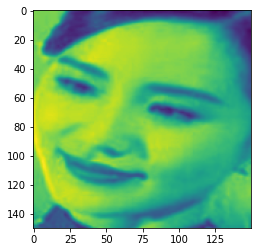

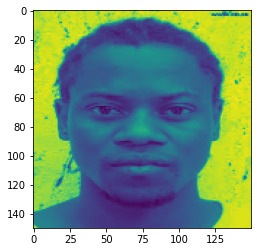

In [14]:
for i in range(10,30):
    plt.imshow(np.reshape(data[i], (150,150)))
    plt.show()

In [15]:
labels[10:30]

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

## Saving Data and Labels for training and testing the model

In [16]:
import numpy as np
np.save('data.npy', data)
np.save('labels.npy', labels)

# Face_Mask_Detection (Train and Test data)



***This code is used to load the data stored and feed them to our Convolutional Neural Network.***

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data = np.load('data.npy')
labels = np.load('labels.npy')

In [19]:
# Normalizing the data
data = data/255.0

In [20]:
labels = np.reshape(labels, (labels.shape[0],1))
print(labels.shape)

(2620, 1)


In [21]:
import keras

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [23]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = "relu", input_shape = data.shape[1:], padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(100, activation = 'relu'))

model.add(Dense(1, activation = "sigmoid"))

In [24]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.1, random_state = 42)

***The below code is used to monitor the epochs based on the validation loss and the models with least validation loss are aumatically saved.***

In [26]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor = 'val_loss', verbose = 0, save_best_only = True, mode = 'auto')

In [27]:
history = model.fit(X_train, y_train, callbacks = [checkpoint], validation_data = (X_test, y_test), epochs = 10)

Train on 2358 samples, validate on 262 samples
Epoch 1/10
2358/2358 [==============================] - 128s 54ms/step - loss: 0.5049 - accuracy: 0.7769 - val_loss: 0.4301 - val_accuracy: 0.7939
Epoch 2/10
2358/2358 [==============================] - 124s 52ms/step - loss: 0.2938 - accuracy: 0.8711 - val_loss: 0.3151 - val_accuracy: 0.8588
Epoch 3/10
2358/2358 [==============================] - 123s 52ms/step - loss: 0.2166 - accuracy: 0.9080 - val_loss: 0.1547 - val_accuracy: 0.9504
Epoch 4/10
2358/2358 [==============================] - 123s 52ms/step - loss: 0.1578 - accuracy: 0.9385 - val_loss: 0.1892 - val_accuracy: 0.9275
Epoch 5/10
2358/2358 [==============================] - 123s 52ms/step - loss: 0.1504 - accuracy: 0.9415 - val_loss: 0.1468 - val_accuracy: 0.9466
Epoch 6/10
2358/2358 [==============================] - 127s 54ms/step - loss: 0.0944 - accuracy: 0.9648 - val_loss: 0.1635 - val_accuracy: 0.9351
Epoch 7/10
2358/2358 [==============================] - 123s 52ms/step 

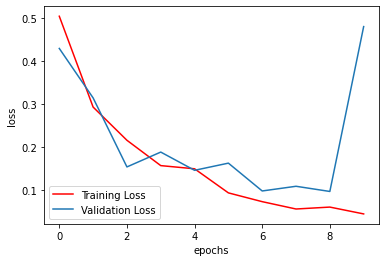

In [28]:
plt.plot(history.history['loss'], 'r', label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

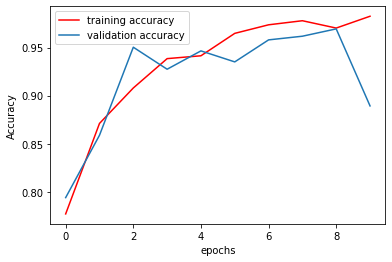

In [34]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
loss, accuracy = model.evaluate(X_test, y_test)

262/262 [==============================] - 4s 14ms/step


In [37]:
print(f"Accuracy = {round(accuracy * 100, 2)} %")

Accuracy = 88.93 %


In [38]:
model.save("Face_Mask_Predictor.h1")